In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

# Az eredeti grafikon

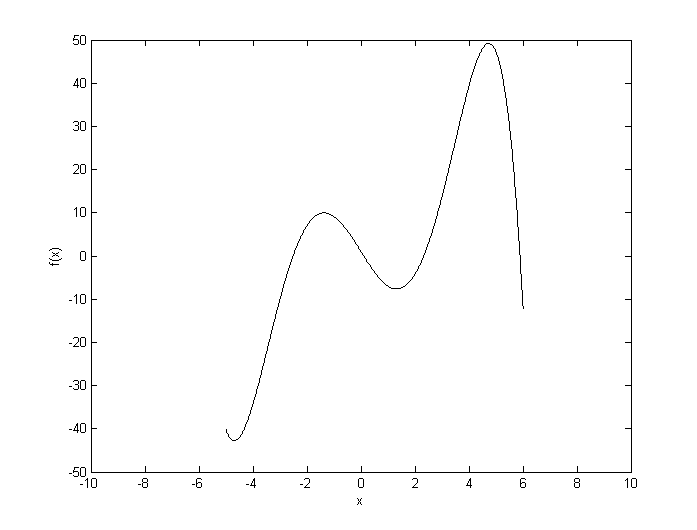

In [2]:
Image('./original.png')

# Csak a görbét tartalmazó, fekete-fehér kép

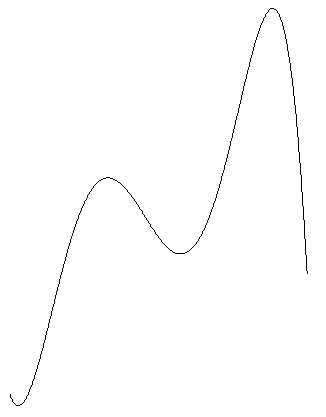

In [3]:
Image('./input.png')

# Értéktáblázat készítése

In [4]:
imagefile = './input.png'
p0 = [-5, -40.25]  # kezdőpont [x, f(x)] koordinátái
p1 = [6, -12.2]    # végpont [x, f(x)] koordinátái

In [5]:
img = plt.imread(imagefile)
img = np.round((img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3).astype(bool)
img = ~ img

f = []
for i in range(img.shape[1]):
    pixels = np.where(img[:, i])[0]
    if pixels.size > 0:
        f.append(-np.mean(pixels))
f = np.array(f) * abs(p0[1] - p1[1]) / abs(f[0] - f[-1])
f += p0[1] - f[0]

x = np.linspace(p0[0], p1[0], f.size)

# Polinomillesztés

In [6]:
n = 5  # fokszám

f(x)≈-0.0489*x^5-0.0044*x^4+1.9587*x^3+0.2016*x^2-9.7874*x+0.3157


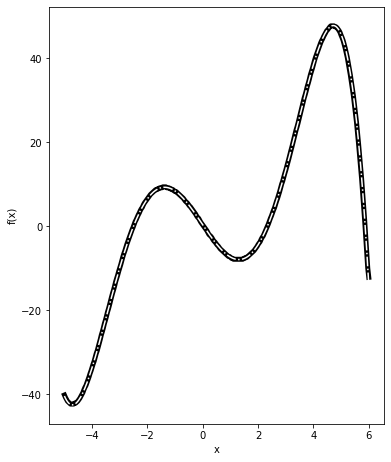

In [7]:
p = np.polyfit(x, f, n)

fstr = ''.join(['%s%.4f*x^%d' % ('' if p[n - i] < 0 or i == n else '+', p[n - i], i) for i in range(n, 1, -1)])
fstr += '%+.4f*x' % p[-2]
fstr += '%+.4f' % p[-1]
print('f(x)≈' + fstr)

plt.figure(figsize=[6, 6 * img.shape[0] / img.shape[1]])
plt.plot(x, f, 'k-', linewidth=5)
plt.plot(x, eval(fstr.replace('^', '**')), 'w-.')
plt.xlabel('x')
plt.ylabel('f(x)');